<a href="https://colab.research.google.com/github/adnanagbaria/DataAnalytics/blob/main/promptEng_DA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lung Cancer Detection with high end Accuracy
This data is about the effectiveness of the cancer prediction system helps people to know their cancer risk wi a low cost and it also helps people to take the appropriate decision based on their cancer risk status. The data is collected from the website online lung cancer prediction system.

**Import dataset:** from https://github.com/adnanagbaria/DataAnalytics/blob/main/survey_lung_cancer.csv

In [1]:
# prompt: Read the csv file from https://github.com/adnanagbaria/DataAnalytics/blob/main/survey_lung_cancer.csv

import pandas as pd

url = 'https://raw.githubusercontent.com/adnanagbaria/DataAnalytics/main/survey_lung_cancer.csv'
df = pd.read_csv(url)

print(df.head())

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      

In [3]:
# prompt: describe df

print(df.describe())

              AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  309.000000  309.000000      309.000000  309.000000     309.000000   
mean    62.673139    1.563107        1.569579    1.498382       1.501618   
std      8.210301    0.496806        0.495938    0.500808       0.500808   
min     21.000000    1.000000        1.000000    1.000000       1.000000   
25%     57.000000    1.000000        1.000000    1.000000       1.000000   
50%     62.000000    2.000000        2.000000    1.000000       2.000000   
75%     69.000000    2.000000        2.000000    2.000000       2.000000   
max     87.000000    2.000000        2.000000    2.000000       2.000000   

       CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  ALCOHOL CONSUMING  \
count       309.000000  309.000000  309.000000  309.000000         309.000000   
mean          1.504854    1.673139    1.556634    1.556634           1.556634   
std           0.500787    0.469827    0.497588    0.497588           0.4

# Pre-processing
* Check if null values
* check for duplicate data

In [4]:
# prompt: check if null values

print(df.isnull().sum())

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [7]:
# prompt: print duplicate rows

# check for duplicate data
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows :")
duplicate_rows

Duplicate Rows :


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
99,M,56,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
100,M,58,2,1,1,1,1,1,2,2,2,2,1,1,1,YES
117,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
199,F,55,2,1,1,2,2,2,2,2,2,1,1,2,2,YES
212,M,58,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
223,M,63,2,2,2,1,2,2,2,2,1,1,2,1,1,YES
256,M,60,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
275,M,64,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
284,M,58,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
285,F,58,2,2,2,2,1,2,1,1,1,2,2,2,1,YES


In [8]:
# prompt: drop duplicated rows

df.drop_duplicates(inplace=True)
print("DataFrame after dropping duplicate rows:")
df

DataFrame after dropping duplicate rows:


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
280,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
281,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
282,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO


# Data Analytics
We convert non-numerical values to numerical. We have two column: 'GENDER' and 'LUNG_CANCER'

In [11]:
# prompt: convert 'GENDER' and 'LUNG_CANCER' to numerical value

df['GENDER'] = df['GENDER'].map({'M': 1, 'F': 0})
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

print(df.head())

   GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0     NaN   69        1               2        2              1   
1     NaN   74        2               1        1              1   
2     NaN   59        1               1        1              2   
3     NaN   63        2               2        2              1   
4     NaN   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0                    2               

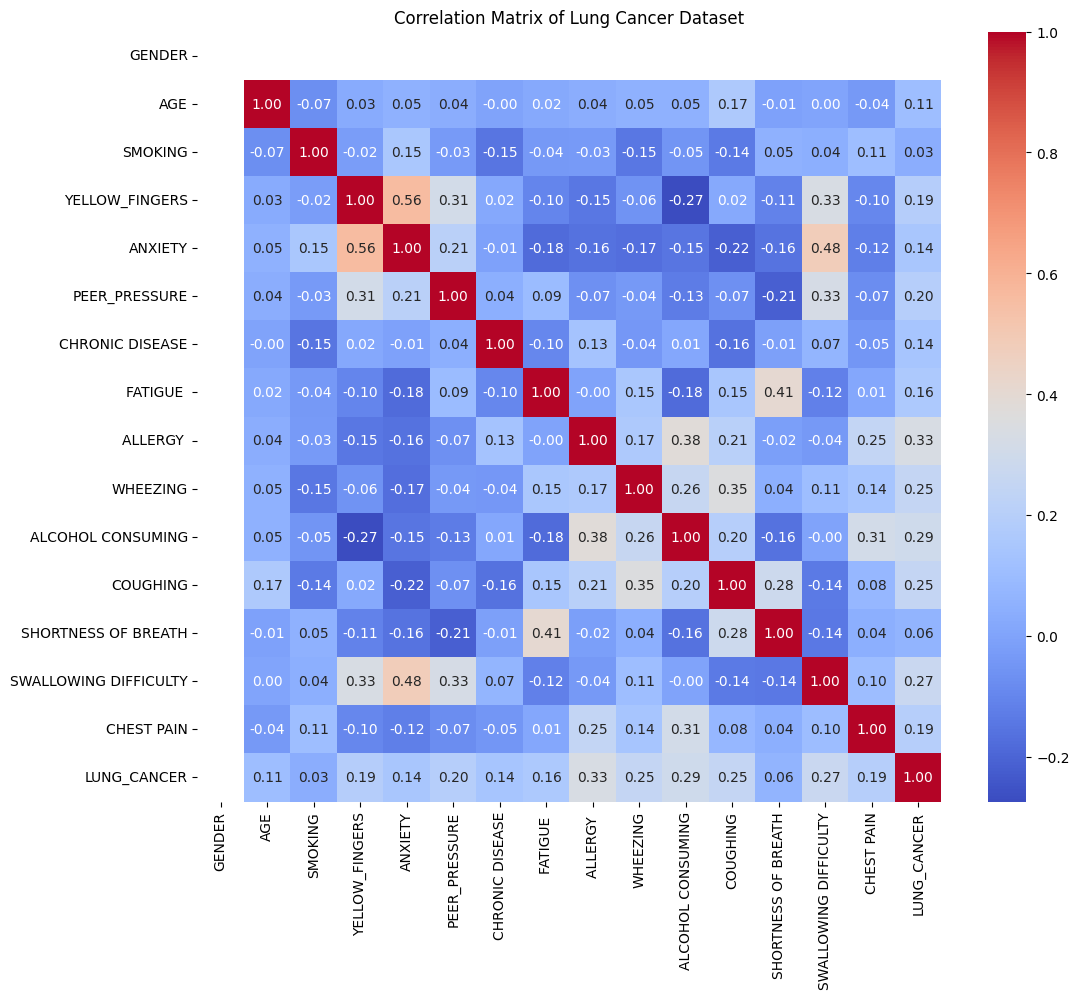

In [12]:
# prompt: show correlation

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Lung Cancer Dataset')
plt.show()